# HW2

In [1]:
# General packages
import setup_problem
from ridge_regression import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

def print_round(round, total):
    print("\r In iteration No.%s/ %s" % (round, total), end="")

### 1. Problem Review

In [2]:
(x_train_orig, y_train, x_test_orig, y_test, 
    target_fn, coefs_true, featurize) = setup_problem.load_problem('lasso_data.pickle')

In [3]:
x_train_orig.shape

(100,)

In [4]:
x_train = featurize(x_train_orig)
x_test = featurize(x_test_orig)
print(x_train.shape, y_train.shape)

(100, 400) (100,)


<Figure size 1000x1000 with 0 Axes>

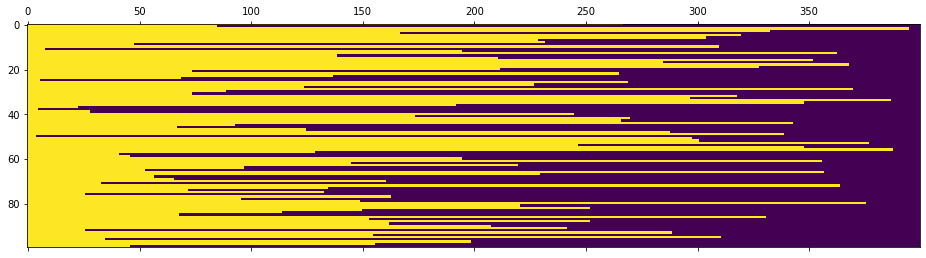

In [12]:
fig = plt.figure(figsize=(10,10), dpi=100)
plt.matshow(x_train)

### 2. Ridge Regression

* Choose the **lambda**.

In [13]:
def avg_square_loss(pred, truth):
    residual = truth - pred
    return np.sum(residual**2) / pred.shape[0]

l2reg_list = np.arange(0, 2, 0.1)
loss = np.empty(l2reg_list.shape[0])
for i in range(l2reg_list.shape[0]):
    print_round(i+1, l2reg_list.shape[0])
    model = RidgeRegression(l2reg_list[i])
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    loss[i] = avg_square_loss(y_predict, y_test)
loss

 In iteration No.20/ 20

array([0.17259175, 0.14456607, 0.14903862, 0.15215013, 0.15487545,
       0.15750554, 0.16014349, 0.1628178 , 0.16553267, 0.16828497,
       0.17106789, 0.17387315, 0.17669305, 0.17952101, 0.18235005,
       0.18517543, 0.18799269, 0.19079806, 0.1935884 , 0.19636109])

Text(0.4, 0.14456606956383716, 'lambda_min = 0.1')

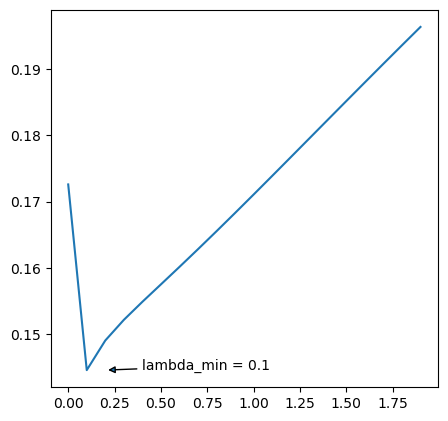

In [14]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,5), dpi=100)
ax.plot(l2reg, loss)
ax.annotate('lambda_min = %s'%0.1, 
            xy=(l2reg[1]+0.1, loss[1]), 
            xytext=(l2reg[1]+0.3, loss[1]), 
            arrowprops={'arrowstyle':'-|>'})

* Plot the **training data**, **target function**, **unregularized prediction** and **regularized prediction**.

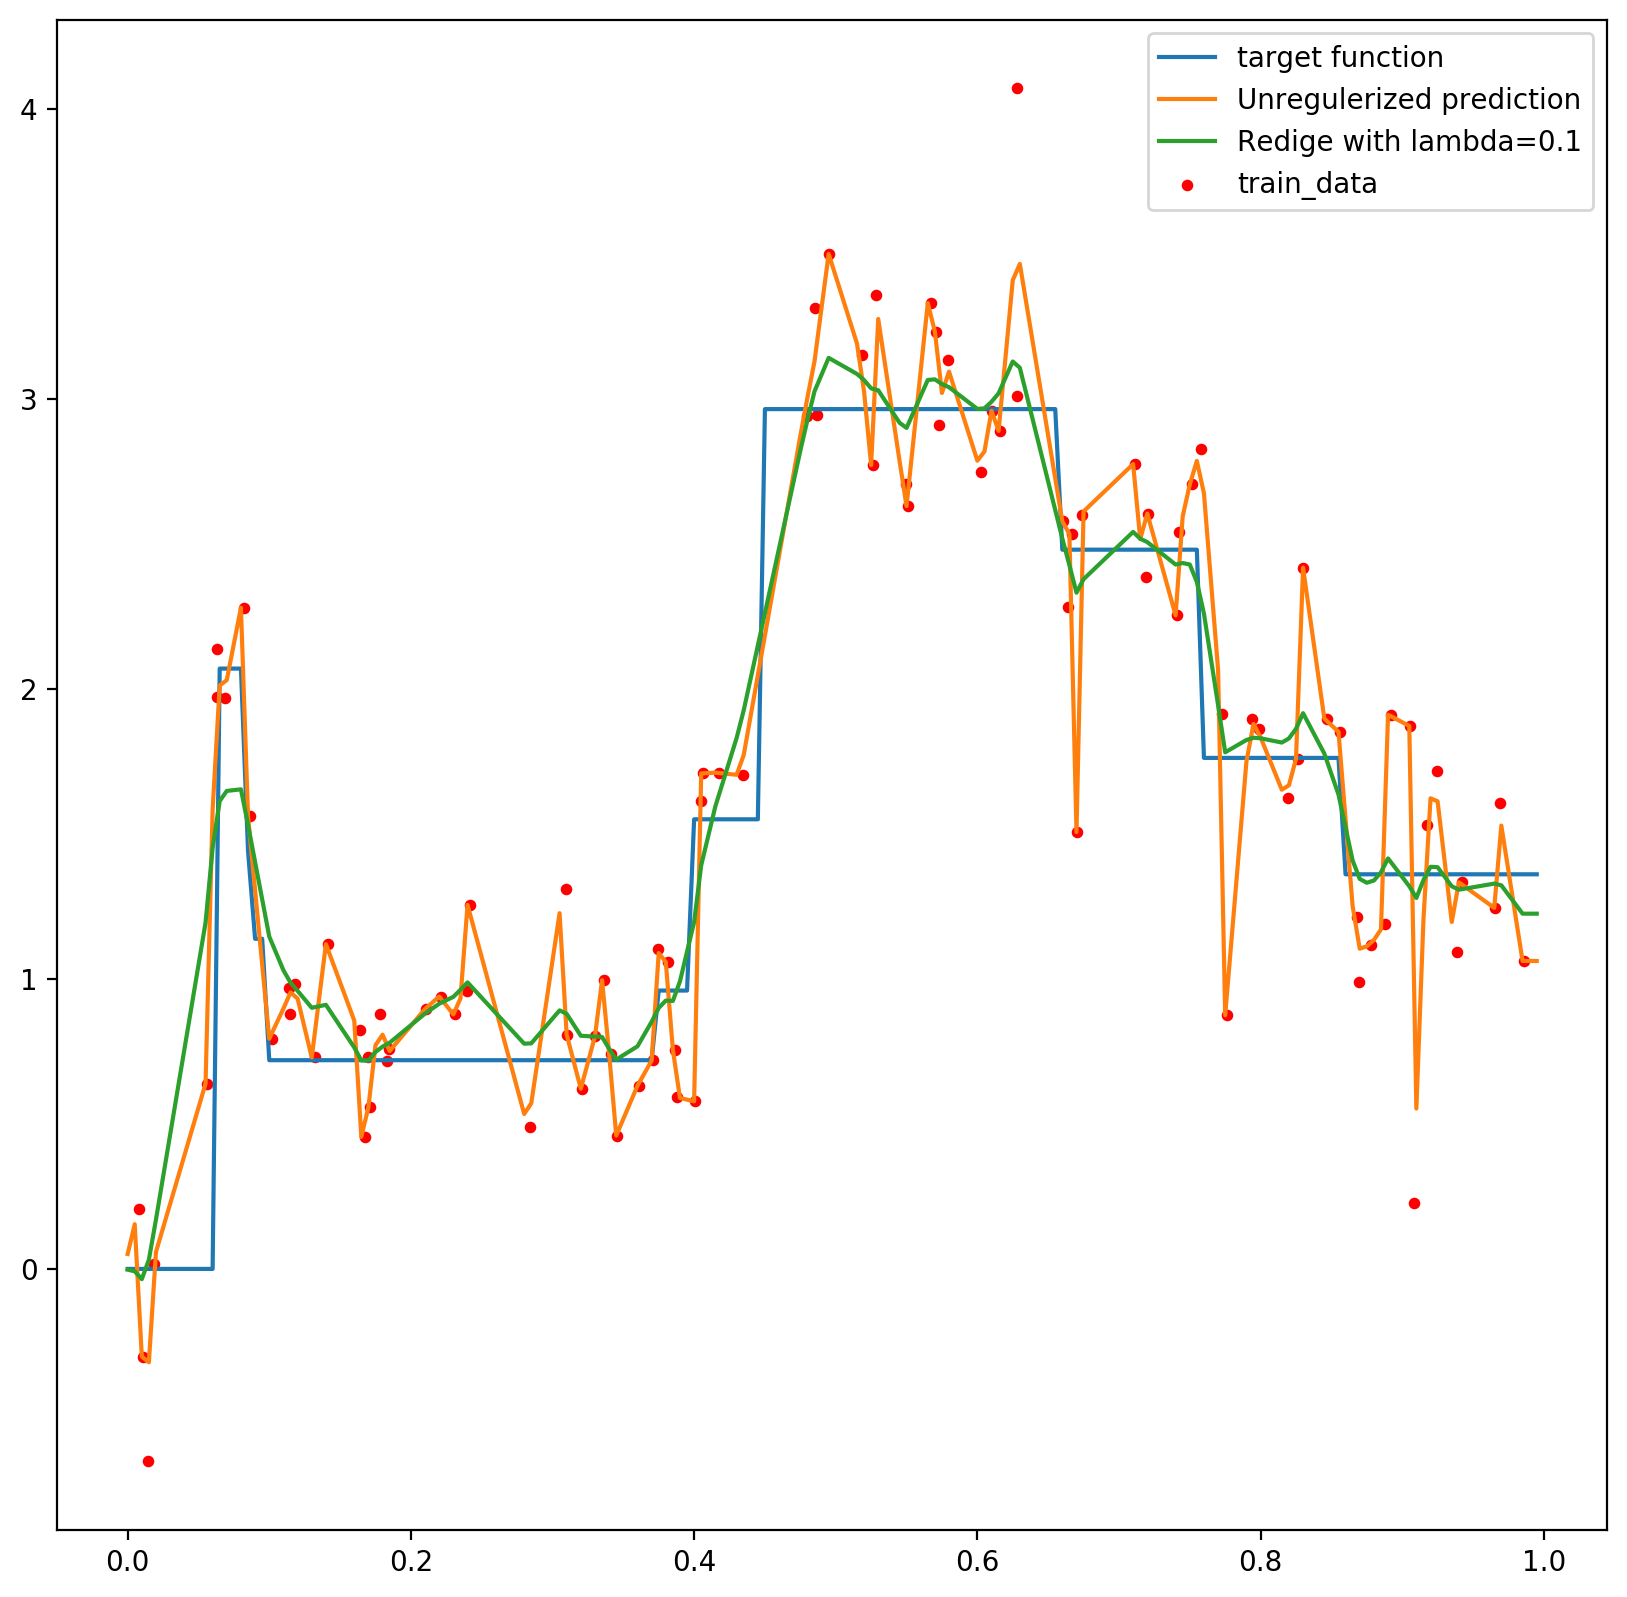

In [62]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10), dpi=200)

# plot train data
ax.scatter(x_train_orig, y_train, s=10, color='red', label='train_data')

# plot target_func
target_x = np.arange(0, 1, 0.005)
target_y = target_fn(target_x)
ax.plot(target_x, target_y, label='target function')

# plot unregularized prediction
unreg_x = np.arange(0, 1, 0.005)
unreg_model = RidgeRegression(l2reg=0)
unreg_model.fit(x_train, y_train)
unreg_y = unreg_model.predict(featurize(unreg_x))
ax.plot(unreg_x, unreg_y, label='Unregulerized prediction')

# plot regularized prediction
best_reg_x = np.arange(0, 1, 0.005)
best_reg_model = RidgeRegression(l2reg=0.1)
best_reg_model.fit(x_train, y_train)
best_reg_y = best_reg_model.predict(featurize(best_reg_x))
ax.plot(best_reg_x, best_reg_y, label='Redige with lambda=0.1')

ax.legend()
ax.grid(True)

* Plot the **weights** of those functions 

Text(0.5, 1.0, 'Ridge with lambda=0.1')

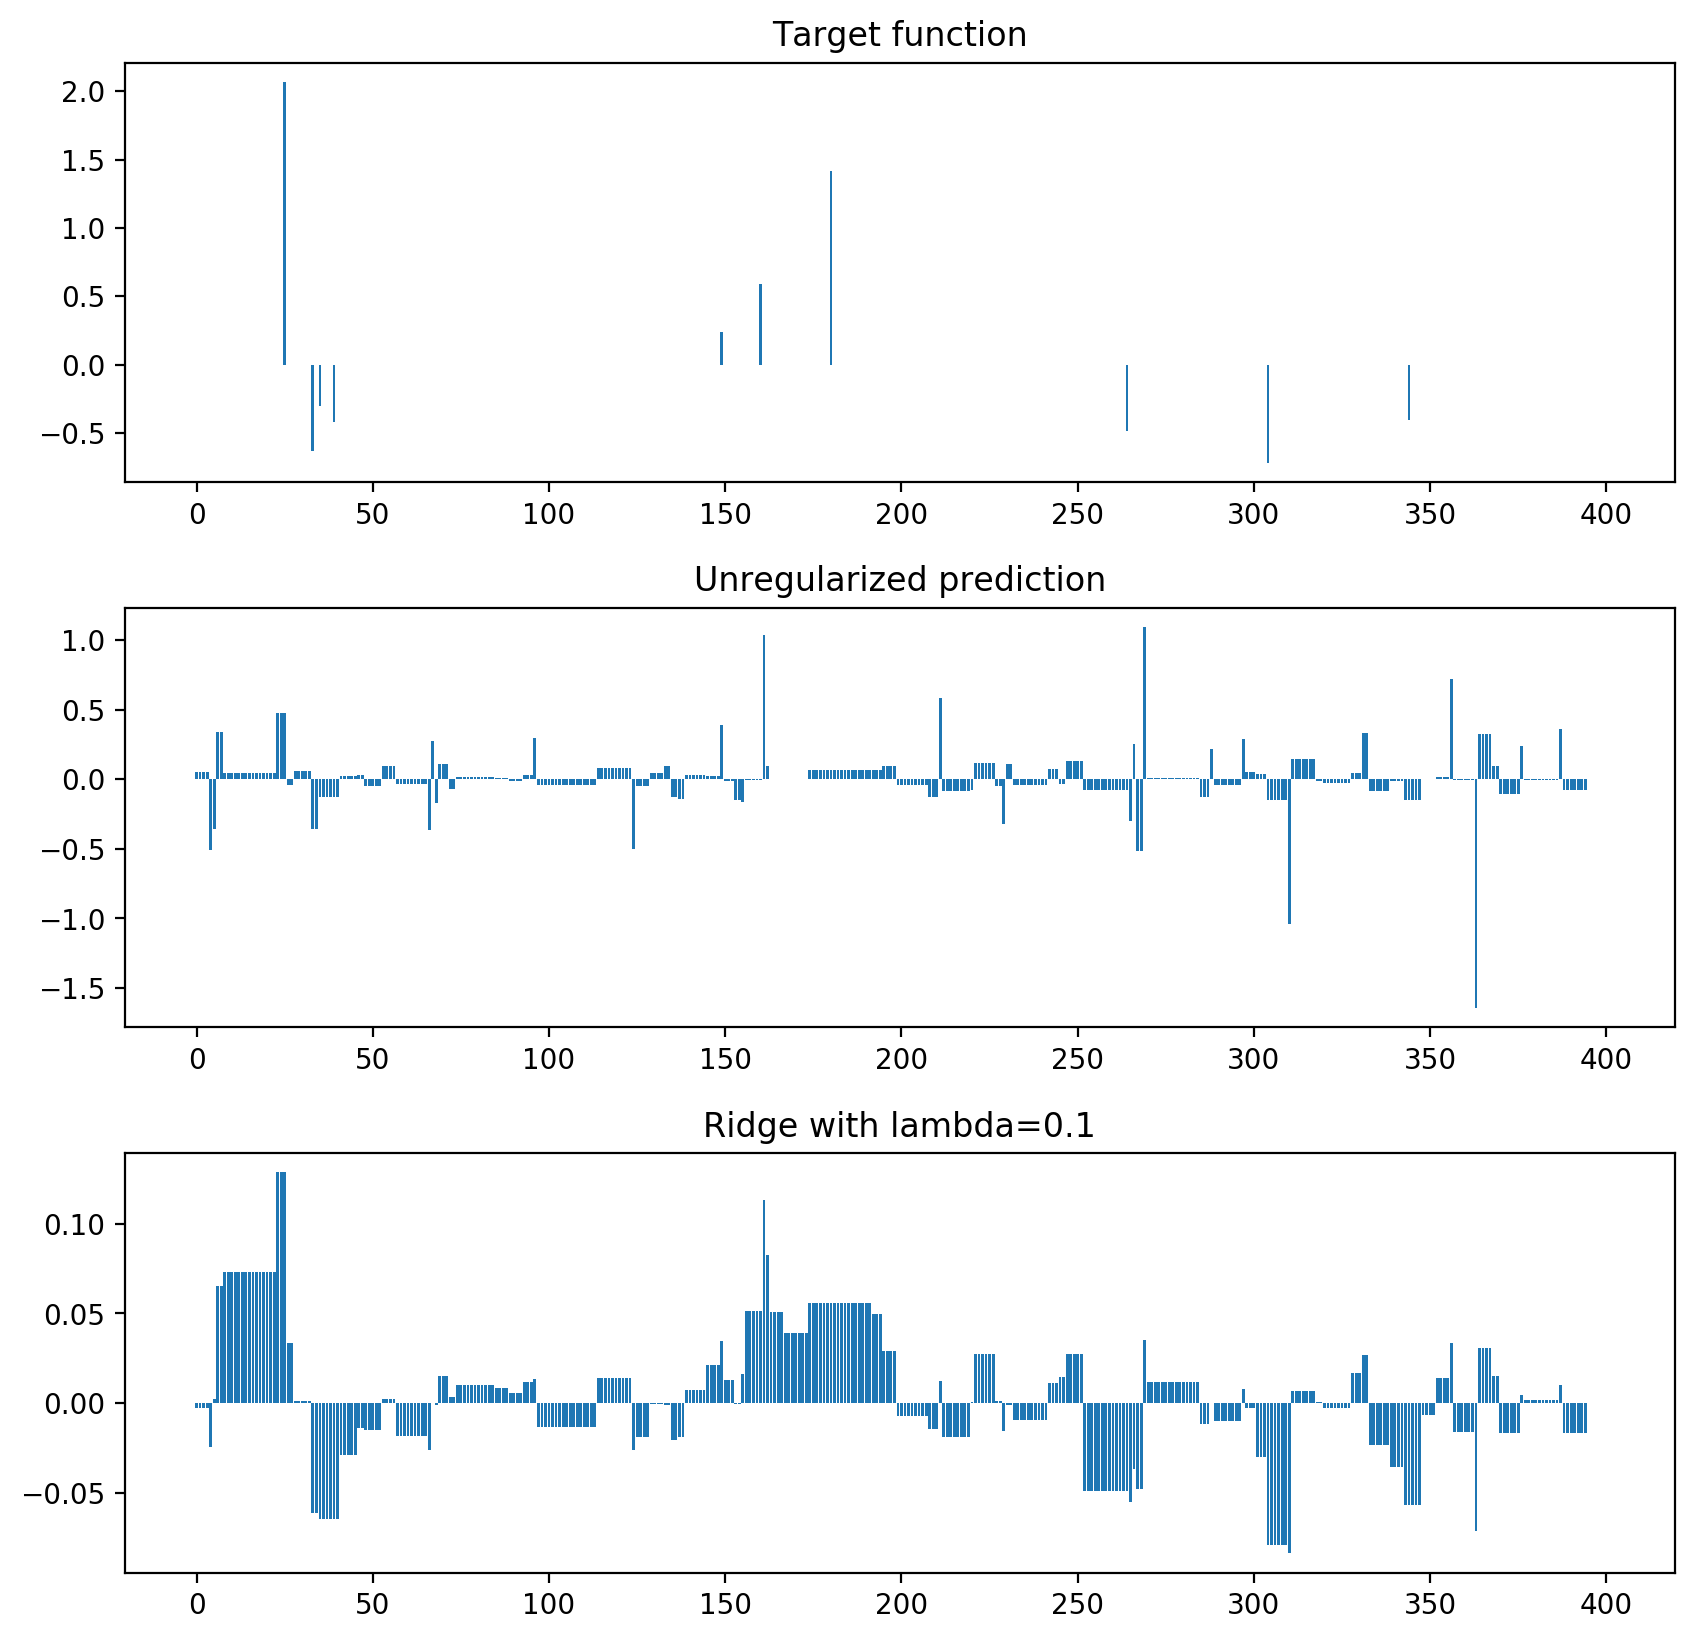

In [63]:
fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(10,10), dpi=200)
fig.subplots_adjust(hspace=0.3)

ax[0].bar(np.arange(coefs_true.shape[0]), coefs_true)
ax[0].set_title('Target function')

ax[1].bar(np.arange(unreg_model.w_.shape[0]), unreg_model.w_)
ax[1].set_title('Unregularized prediction')

ax[2].bar(np.arange(best_reg_model.w_.shape[0]), best_reg_model.w_)
ax[2].set_title('Ridge with lambda=0.1')